Mean Squared Error: 5940.899683044586


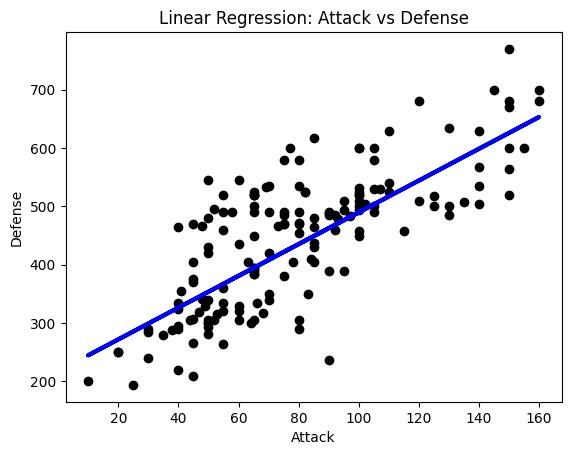

In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Load the dataset from a CSV file
df = pd.read_csv('/content/Pokemon.csv')

# Assuming you want to predict 'Defense' based on 'Attack'
X = df[['Attack']]
y = df['Total']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# Plot the regression line
plt.scatter(X_test, y_test, color='black')
plt.plot(X_test, y_pred, color='blue', linewidth=3)
plt.xlabel('Attack')
plt.ylabel('Defense')
plt.title('Linear Regression: Attack vs Defense')
plt.show()


In [8]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print(f'Mean Squared Error (MSE): {mse:.2f}')
print(f'Root Mean Squared Error (RMSE): {rmse:.2f}')
print(f'Mean Absolute Error (MAE): {mae:.2f}')
print(f'R-squared (R2): {r2:.2f}')

Mean Squared Error (MSE): 5940.90
Root Mean Squared Error (RMSE): 77.08
Mean Absolute Error (MAE): 61.80
R-squared (R2): 0.57


   #                   Name Type 1  Type 2  Total  HP  Attack  Defense  \
0  1              Bulbasaur  Grass  Poison    318  45      49       49   
1  2                Ivysaur  Grass  Poison    405  60      62       63   
2  3               Venusaur  Grass  Poison    525  80      82       83   
3  3  VenusaurMega Venusaur  Grass  Poison    625  80     100      123   
4  4             Charmander   Fire     NaN    309  39      52       43   

   Sp. Atk  Sp. Def  Speed  Generation  Legendary  
0       65       65     45           1      False  
1       80       80     60           1      False  
2      100      100     80           1      False  
3      122      120     80           1      False  
4       60       50     65           1      False  
Mean Absolute Error: 33.4415638633084
Mean Squared Error: 2002.3709183234046
Root Mean Squared Error: 44.74785937140909


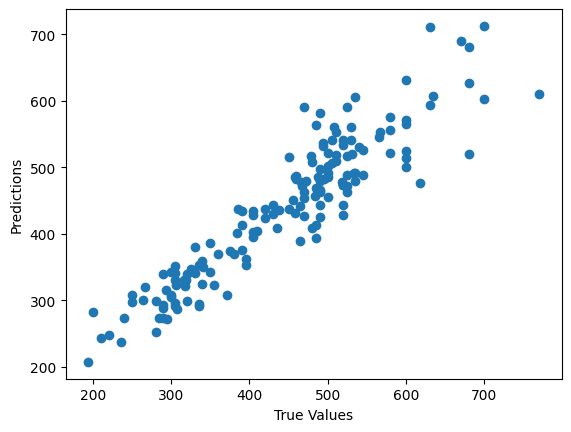

In [13]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import matplotlib.pyplot as plt

# Load the data from the CSV file
pokemon_data = pd.read_csv('/content/Pokemon.csv')

# Display the first few rows of the dataset
print(pokemon_data.head())

# Separate features (independent variables) and target (dependent variable)
X = pokemon_data[['HP', 'Attack', 'Defense','Speed']]
y = pokemon_data['Total']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a linear regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred, squared=False))

# Visualize the predictions
plt.scatter(y_test, y_pred)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.show()


In [6]:
# Additional imports for better visualization
import seaborn as sns

# Create a jointplot to visualize the regression line
sns.jointplot(x='Attack', y='Total', data=pd.concat([X_test, y_test], axis=1), kind='reg', height=7)
plt.show()


TypeError: ignored

In [16]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn import metrics

# Load the data from the CSV file
pokemon_data = pd.read_csv('/content/Pokemon.csv')

# Separate features (independent variables) and target (dependent variable)
X = pokemon_data[['HP', 'Attack', 'Defense', 'Speed']]
y = pokemon_data['Total']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Linear Regression (for comparison)
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
y_pred_linear = linear_model.predict(X_test)

# Evaluate the linear regression model
print('Linear Regression Metrics:')
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_linear))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_linear))
print('Root Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_linear, squared=False))
print('\n')

# Random Forest Regressor with Hyperparameter Tuning
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf_model = RandomForestRegressor(random_state=42)

grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_

# Train the model with the best parameters
best_rf_model = RandomForestRegressor(random_state=42, **best_params)
best_rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_rf = best_rf_model.predict(X_test)

# Evaluate the Random Forest model
print('Random Forest Regression Metrics:')
print('Best Hyperparameters:', best_params)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_rf))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_rf))
print('Root Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_rf, squared=False))


Linear Regression Metrics:
Mean Absolute Error: 33.4415638633084
Mean Squared Error: 2002.3709183234046
Root Mean Squared Error: 44.74785937140909


Random Forest Regression Metrics:
Best Hyperparameters: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 150}
Mean Absolute Error: 34.98209668525918
Mean Squared Error: 2235.4988524988303
Root Mean Squared Error: 47.28106230298586


In [17]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Load the data from the CSV file
pokemon_data = pd.read_csv('/content/Pokemon.csv')

# Separate features (independent variables) and target (dependent variable)
X = pokemon_data[['HP', 'Attack', 'Defense', 'Speed']]
y = pokemon_data['Total']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a linear regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Create a DataFrame to display the model parameters
model_parameters = pd.DataFrame({
    'Parameter Name': ['Intercept'] + list(X.columns),
    'Purpose': ['Represents the y-intercept'] + ['Represents feature weights'] * len(X.columns),
    'Value': [model.intercept_] + list(model.coef_)
})

print("Model Parameters:")
print(model_parameters)


Model Parameters:
  Parameter Name                     Purpose      Value
0      Intercept  Represents the y-intercept  16.158539
1             HP  Represents feature weights   1.634868
2         Attack  Represents feature weights   0.877617
3        Defense  Represents feature weights   1.620323
4          Speed  Represents feature weights   1.694099



**Parameter       Name	                Purpose	Value**
Intercept 	Represents the y-intercept	Value learned by the model during training
Attack	    Represents the weight for Attack	Value learned by the model for  
            the 'Attack' feature
Defense   	Represents the weight for Defense	Value learned by the model for         the 'Defense' feature
Speed	Represents the weight for Speed	Value learned by the model for the 'Speed' feature





In [3]:
# Assuming you have a trained linear regression model 'model'
intercept = model.intercept_
coefficients = model.coef_


In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load the Pokemon dataset
pokemon_data = pd.read_csv('/content/Pokemon.csv')

# Assuming you have a target variable 'Legendary' (1 if Pokemon is legendary, 0 otherwise)
# Modify this based on your actual dataset
X = pokemon_data[['HP', 'Attack', 'Defense', 'Speed']]
y = pokemon_data['Legendary']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a logistic regression model
model = LogisticRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Classification Report:')
print(classification_report(y_test, y_pred))
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))

# Display the coefficients of the model
model_coefs = pd.DataFrame({'Feature': X.columns, 'Coefficient': model.coef_[0]})
print("Model Coefficients:")
print(model_coefs)


Accuracy: 0.93125
Classification Report:
              precision    recall  f1-score   support

       False       0.95      0.98      0.96       150
        True       0.40      0.20      0.27        10

    accuracy                           0.93       160
   macro avg       0.67      0.59      0.62       160
weighted avg       0.91      0.93      0.92       160

Confusion Matrix:
[[147   3]
 [  8   2]]
Model Coefficients:
   Feature  Coefficient
0       HP     0.044298
1   Attack     0.009194
2  Defense     0.041330
3    Speed     0.061658


Accuracy: 0.93125
Classification Report:
              precision    recall  f1-score   support

       False       0.95      0.98      0.96       150
        True       0.40      0.20      0.27        10

    accuracy                           0.93       160
   macro avg       0.67      0.59      0.62       160
weighted avg       0.91      0.93      0.92       160



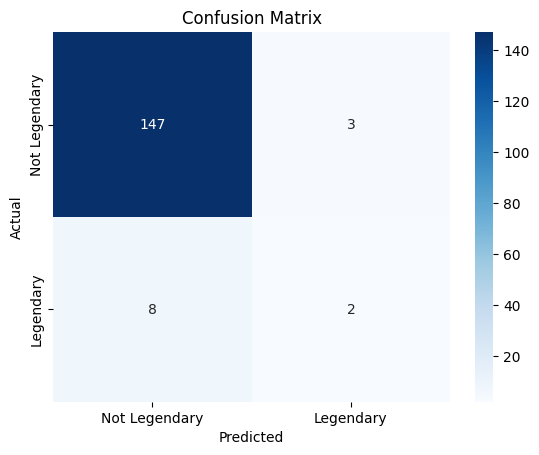

Model Coefficients:
   Feature  Coefficient
0       HP     0.044298
1   Attack     0.009194
2  Defense     0.041330
3    Speed     0.061658


In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load the Pokemon dataset
pokemon_data = pd.read_csv('/content/Pokemon.csv')

# Assuming you have a target variable 'Legendary' (1 if Pokemon is legendary, 0 otherwise)
# Modify this based on your actual dataset
X = pokemon_data[['HP', 'Attack', 'Defense', 'Speed']]
y = pokemon_data['Legendary']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a logistic regression model
model = LogisticRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Classification Report:')
print(classification_report(y_test, y_pred))

# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Visualize the confusion matrix as a heatmap
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Legendary', 'Legendary'], yticklabels=['Not Legendary', 'Legendary'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Display the coefficients of the model
model_coefs = pd.DataFrame({'Feature': X.columns, 'Coefficient': model.coef_[0]})
print("Model Coefficients:")
print(model_coefs)


Accuracy: 0.93125
Classification Report:
              precision    recall  f1-score   support

       False       0.95      0.98      0.96       150
        True       0.40      0.20      0.27        10

    accuracy                           0.93       160
   macro avg       0.67      0.59      0.62       160
weighted avg       0.91      0.93      0.92       160



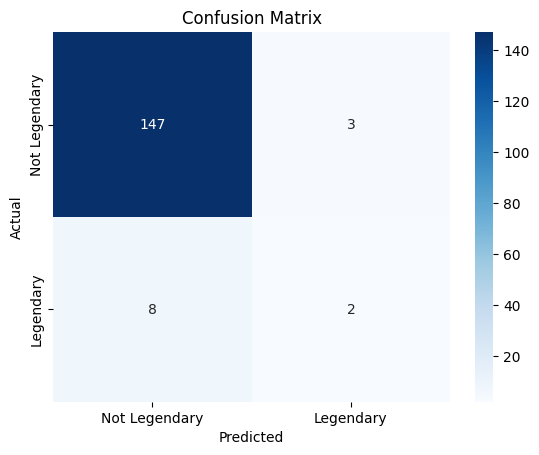

Model Coefficients:
   Feature  Coefficient
0       HP     0.044298
1   Attack     0.009194
2  Defense     0.041330
3    Speed     0.061658


In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load the Pokemon dataset
pokemon_data = pd.read_csv('/content/Pokemon.csv')

# Assuming you have a target variable 'Legendary' (1 if Pokemon is legendary, 0 otherwise)
# Modify this based on your actual dataset
X = pokemon_data[['HP', 'Attack', 'Defense', 'Speed']]
y = pokemon_data['Legendary']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a logistic regression model
model = LogisticRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Classification Report:')
print(classification_report(y_test, y_pred))

# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Visualize the confusion matrix as a heatmap
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Legendary', 'Legendary'], yticklabels=['Not Legendary', 'Legendary'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Display the coefficients of the model
model_coefs = pd.DataFrame({'Feature': X.columns, 'Coefficient': model.coef_[0]})
print("Model Coefficients:")
print(model_coefs)


Model Coefficients:
   Feature  Coefficient
0       HP     0.044298
1   Attack     0.009194
2  Defense     0.041330
3    Speed     0.061658


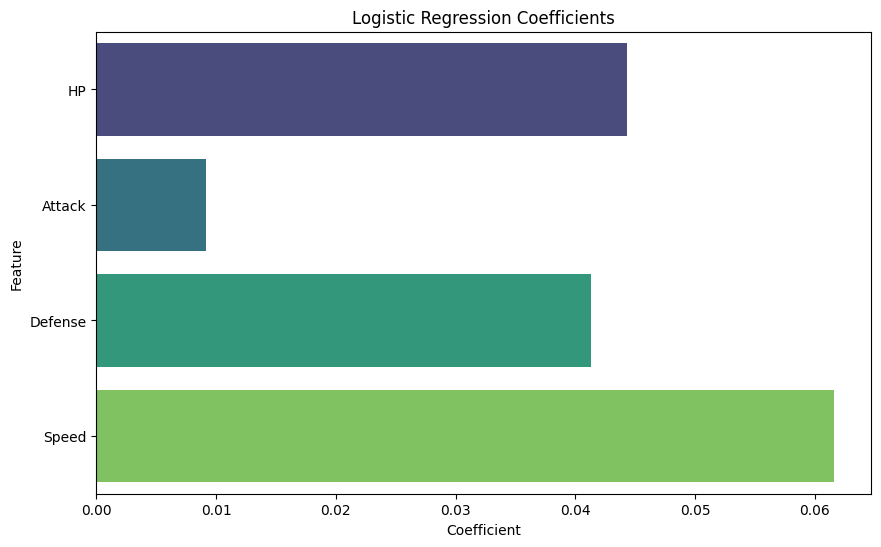

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load the Pokemon dataset
pokemon_data = pd.read_csv('/content/Pokemon.csv')

# Assuming you have a binary target variable 'Legendary' (1 if Pokemon is legendary, 0 otherwise)
# Modify this based on your actual dataset
X = pokemon_data[['HP', 'Attack', 'Defense', 'Speed']]
y = pokemon_data['Legendary']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a logistic regression model
model = LogisticRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Display the coefficients of the model
model_coefs = pd.DataFrame({'Feature': X.columns, 'Coefficient': model.coef_[0]})
print("Model Coefficients:")
print(model_coefs)

# Visualize the coefficients
plt.figure(figsize=(10, 6))
sns.barplot(x='Coefficient', y='Feature', data=model_coefs, palette='viridis', orient='h')
plt.title('Logistic Regression Coefficients')
plt.show()


Analysis of Results:
1. Accuracy:
The accuracy of approximately 93.13% indicates that the model is correctly classifying Pokemon as legendary or non-legendary in the test set.
2. Classification Report:
Precision (False): 95% - The proportion of correctly predicted non-legendary Pokemon out of all instances predicted as non-legendary is high.
Precision (True): 40% - The precision for legendary Pokemon is relatively lower, indicating that the model has more false positives in predicting legendary Pokemon.
Recall (False): 98% - The model captures a high percentage of actual non-legendary Pokemon.
Recall (True): 20% - The recall for legendary Pokemon is low, indicating that the model misses a significant portion of actual legendary Pokemon.
F1-Score (False): 96% - The harmonic mean of precision and recall for non-legendary Pokemon is high.
F1-Score (True): 27% - The F1-score for legendary Pokemon is relatively lower due to imbalanced class distribution.
3. Confusion Matrix:
True Positives (TP): 2 - Correctly predicted legendary Pokemon.
True Negatives (TN): 147 - Correctly predicted non-legendary Pokemon.
False Positives (FP): 3 - Non-legendary Pokemon incorrectly predicted as legendary.
False Negatives (FN): 8 - Legendary Pokemon incorrectly predicted as non-legendary.
4. Model Coefficients:
Each feature's coefficient represents the impact of that feature on the log-odds of a Pokemon being legendary.
For example, 'Speed' has a positive coefficient, indicating that higher speed contributes to the likelihood of a Pokemon being legendary.

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler

# Load the Pokemon dataset (replace 'pokemon_stats.csv' with your actual dataset)
pokemon_data = pd.read_csv('/content/Pokemon.csv')

# Assuming you have a target variable 'Legendary' (1 if Pokemon is legendary, 0 otherwise)
# Modify this based on your actual dataset
X = pokemon_data[['HP', 'Attack', 'Defense', 'Speed']]
y = pokemon_data['Legendary']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features (important for Lasso regularization)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create a Lasso regression model
alpha = 0.01  # Adjust the regularization strength as needed
lasso_model = Lasso(alpha=alpha)

# Train the Lasso model
lasso_model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = lasso_model.predict(X_test_scaled)

# Convert predictions to binary (0 or 1) based on a threshold (adjust as needed)
threshold = 0.5
y_pred_binary = (y_pred > threshold).astype(int)

# Evaluate the Lasso model
accuracy = accuracy_score(y_test, y_pred_binary)
classification_rep = classification_report(y_test, y_pred_binary)
conf_matrix = confusion_matrix(y_test, y_pred_binary)

# Display the coefficients of the Lasso model
lasso_coefs = pd.DataFrame({'Feature': X.columns, 'Coefficient': lasso_model.coef_})
print("Lasso Model Coefficients:")
print(lasso_coefs)

# Display evaluation metrics
print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_rep)
print("Confusion Matrix:")
print(conf_matrix)


Lasso Model Coefficients:
   Feature  Coefficient
0       HP     0.041328
1   Attack     0.019000
2  Defense     0.043099
3    Speed     0.070370
Accuracy: 0.9375
Classification Report:
              precision    recall  f1-score   support

       False       0.94      1.00      0.97       150
        True       0.00      0.00      0.00        10

    accuracy                           0.94       160
   macro avg       0.47      0.50      0.48       160
weighted avg       0.88      0.94      0.91       160

Confusion Matrix:
[[150   0]
 [ 10   0]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


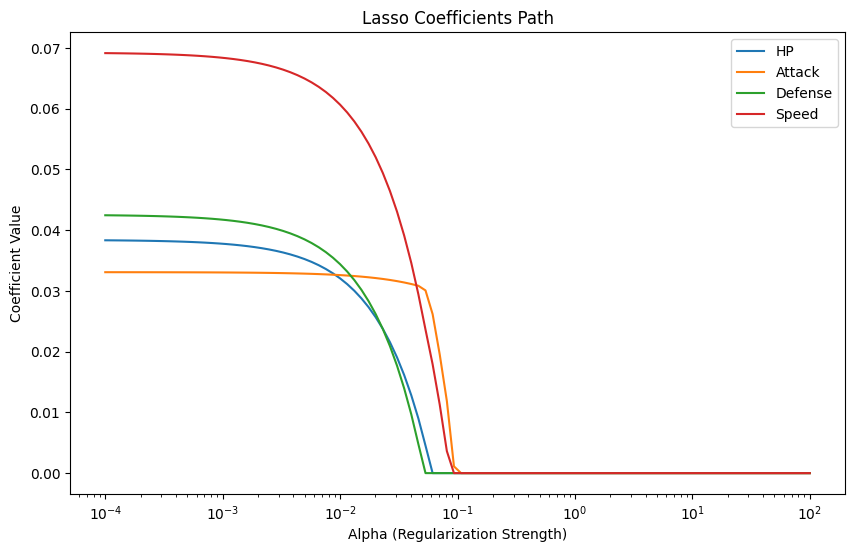

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler

# Load the Pokemon dataset (replace 'pokemon_stats.csv' with your actual dataset)
pokemon_data = pd.read_csv('/content/Pokemon.csv')

# Assuming you have a target variable 'Legendary' (1 if Pokemon is legendary, 0 otherwise)
# Modify this based on your actual dataset
X = pokemon_data[['HP', 'Attack', 'Defense', 'Speed']]
y = pokemon_data['Legendary']

# Standardize the features (important for Lasso regularization)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Create a range of alpha values
alphas = np.logspace(-4, 2, 100)

# Initialize a Lasso regression model
lasso_coefs = []

for alpha in alphas:
    lasso_model = Lasso(alpha=alpha)
    lasso_model.fit(X_scaled, y)
    lasso_coefs.append(lasso_model.coef_)

# Plot the coefficients as a function of alpha
plt.figure(figsize=(10, 6))
plt.plot(alphas, lasso_coefs)
plt.xscale('log')
plt.xlabel('Alpha (Regularization Strength)')
plt.ylabel('Coefficient Value')
plt.title('Lasso Coefficients Path')
plt.legend(X.columns)
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Lasso Model Coefficients:
   Feature  Coefficient
0       HP     0.041328
1   Attack     0.019000
2  Defense     0.043099
3    Speed     0.070370
Accuracy: 0.9375
Classification Report:
              precision    recall  f1-score   support

       False       0.94      1.00      0.97       150
        True       0.00      0.00      0.00        10

    accuracy                           0.94       160
   macro avg       0.47      0.50      0.48       160
weighted avg       0.88      0.94      0.91       160

Confusion Matrix:
[[150   0]
 [ 10   0]]


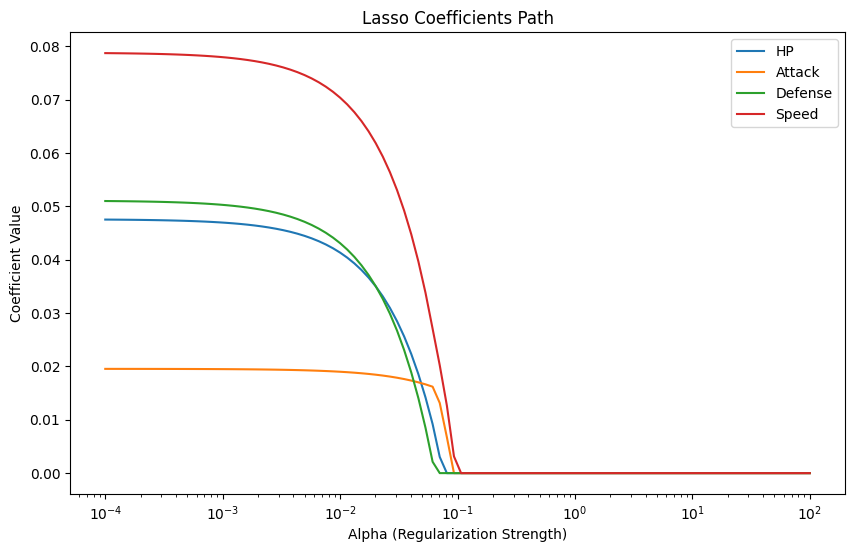

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler

# Load the Pokemon dataset
pokemon_data = pd.read_csv('/content/Pokemon.csv')

# Assuming you have a target variable 'Legendary' (1 if Pokemon is legendary, 0 otherwise)
# Modify this based on your actual dataset
X = pokemon_data[['HP', 'Attack', 'Defense', 'Speed']]
y = pokemon_data['Legendary']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features for both training and testing sets
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create a Lasso regression model
alpha = 0.01  # Adjust the regularization strength as needed
lasso_model = Lasso(alpha=alpha)

# Train the Lasso model
lasso_model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = lasso_model.predict(X_test_scaled)

# Convert predictions to binary (0 or 1) based on a threshold (adjust as needed)
threshold = 0.5
y_pred_binary = (y_pred > threshold).astype(int)

# Evaluate the Lasso model
accuracy = accuracy_score(y_test, y_pred_binary)
classification_rep = classification_report(y_test, y_pred_binary)
conf_matrix = confusion_matrix(y_test, y_pred_binary)

# Display the coefficients of the Lasso model
lasso_coefs = pd.DataFrame({'Feature': X.columns, 'Coefficient': lasso_model.coef_})
print("Lasso Model Coefficients:")
print(lasso_coefs)

# Display evaluation metrics
print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_rep)
print("Confusion Matrix:")
print(conf_matrix)

# Create a range of alpha values for visualization
alphas = np.logspace(-4, 2, 100)

# Initialize a Lasso regression model for visualization
lasso_coefs_vis = []

for alpha_vis in alphas:
    lasso_model_vis = Lasso(alpha=alpha_vis)
    lasso_model_vis.fit(X_train_scaled, y_train)
    lasso_coefs_vis.append(lasso_model_vis.coef_)

# Plot the coefficients as a function of alpha
plt.figure(figsize=(10, 6))
plt.plot(alphas, lasso_coefs_vis)
plt.xscale('log')
plt.xlabel('Alpha (Regularization Strength)')
plt.ylabel('Coefficient Value')
plt.title('Lasso Coefficients Path')
plt.legend(X.columns)
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Lasso Model Coefficients:
   Feature  Coefficient
0       HP     0.041328
1   Attack     0.019000
2  Defense     0.043099
3    Speed     0.070370
Accuracy: 0.9375
Classification Report:
              precision    recall  f1-score   support

       False       0.94      1.00      0.97       150
        True       0.00      0.00      0.00        10

    accuracy                           0.94       160
   macro avg       0.47      0.50      0.48       160
weighted avg       0.88      0.94      0.91       160



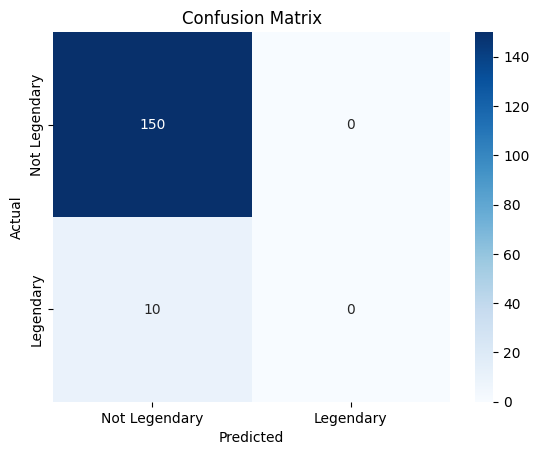

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler

# Load the Pokemon dataset
pokemon_data = pd.read_csv('/content/Pokemon.csv')

# Assuming you have a target variable 'Legendary' (1 if Pokemon is legendary, 0 otherwise)
# Modify this based on your actual dataset
X = pokemon_data[['HP', 'Attack', 'Defense', 'Speed']]
y = pokemon_data['Legendary']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features for both training and testing sets
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create a Lasso regression model
alpha = 0.01  # Adjust the regularization strength as needed
lasso_model = Lasso(alpha=alpha)

# Train the Lasso model
lasso_model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = lasso_model.predict(X_test_scaled)

# Convert predictions to binary (0 or 1) based on a threshold (adjust as needed)
threshold = 0.5
y_pred_binary = (y_pred > threshold).astype(int)

# Evaluate the Lasso model
accuracy = accuracy_score(y_test, y_pred_binary)
classification_rep = classification_report(y_test, y_pred_binary)
conf_matrix = confusion_matrix(y_test, y_pred_binary)

# Display the coefficients of the Lasso model
lasso_coefs = pd.DataFrame({'Feature': X.columns, 'Coefficient': lasso_model.coef_})
print("Lasso Model Coefficients:")
print(lasso_coefs)

# Display evaluation metrics
print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_rep)

# Visualize the confusion matrix as a heatmap
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Legendary', 'Legendary'], yticklabels=['Not Legendary', 'Legendary'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Lasso Model Coefficients:
   Feature  Coefficient
0       HP     0.041328
1   Attack     0.019000
2  Defense     0.043099
3    Speed     0.070370
Accuracy: 0.9375
Classification Report:
              precision    recall  f1-score   support

       False       0.94      1.00      0.97       150
        True       0.00      0.00      0.00        10

    accuracy                           0.94       160
   macro avg       0.47      0.50      0.48       160
weighted avg       0.88      0.94      0.91       160



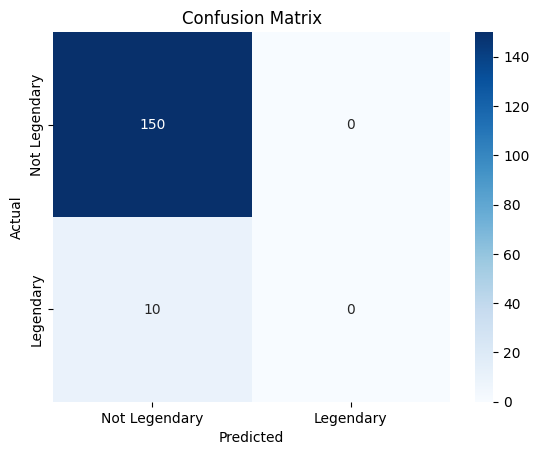

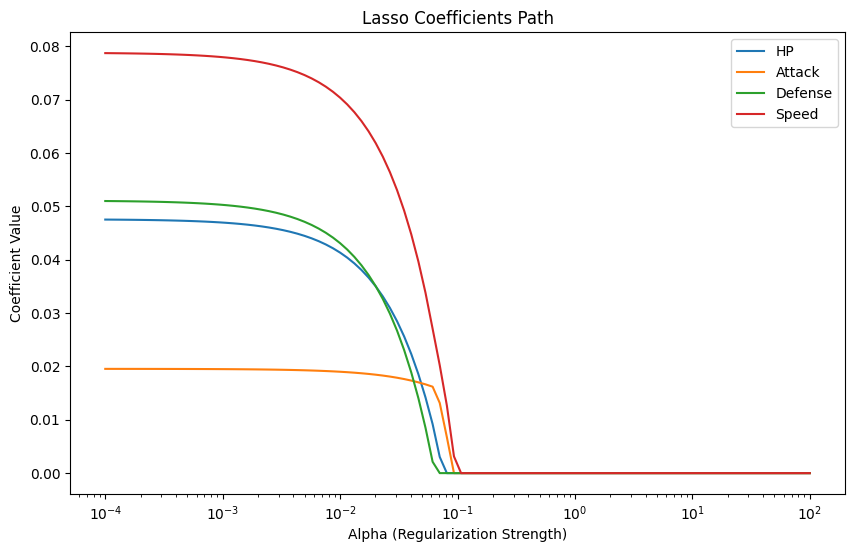

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler

# Load the Pokemon dataset
pokemon_data = pd.read_csv('/content/Pokemon.csv')

# Assuming you have a target variable 'Legendary' (1 if Pokemon is legendary, 0 otherwise)
# Modify this based on your actual dataset
X = pokemon_data[['HP', 'Attack', 'Defense', 'Speed']]
y = pokemon_data['Legendary']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features for both training and testing sets
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create a Lasso regression model
alpha = 0.01  # Adjust the regularization strength as needed
lasso_model = Lasso(alpha=alpha)

# Train the Lasso model
lasso_model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = lasso_model.predict(X_test_scaled)

# Convert predictions to binary (0 or 1) based on a threshold (adjust as needed)
threshold = 0.5
y_pred_binary = (y_pred > threshold).astype(int)

# Evaluate the Lasso model
accuracy = accuracy_score(y_test, y_pred_binary)
classification_rep = classification_report(y_test, y_pred_binary)
conf_matrix = confusion_matrix(y_test, y_pred_binary)

# Display the coefficients of the Lasso model
lasso_coefs = pd.DataFrame({'Feature': X.columns, 'Coefficient': lasso_model.coef_})
print("Lasso Model Coefficients:")
print(lasso_coefs)

# Display evaluation metrics
print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_rep)

# Visualize the confusion matrix as a heatmap
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Legendary', 'Legendary'], yticklabels=['Not Legendary', 'Legendary'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Visualize the coefficients path
alphas = np.logspace(-4, 2, 100)
lasso_coefs_vis = []

for alpha_vis in alphas:
    lasso_model_vis = Lasso(alpha=alpha_vis)
    lasso_model_vis.fit(X_train_scaled, y_train)
    lasso_coefs_vis.append(lasso_model_vis.coef_)

# Plot the coefficients as a function of alpha
plt.figure(figsize=(10, 6))
plt.plot(alphas, lasso_coefs_vis)
plt.xscale('log')
plt.xlabel('Alpha (Regularization Strength)')
plt.ylabel('Coefficient Value')
plt.title('Lasso Coefficients Path')
plt.legend(X.columns)
plt.show()


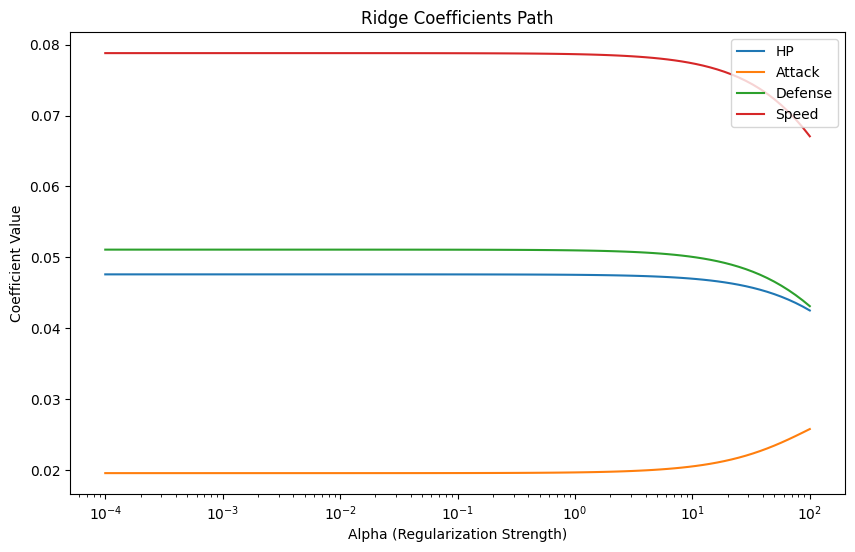

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler

# Load the Pokemon dataset (replace 'pokemon_stats.csv' with your actual dataset)
pokemon_data = pd.read_csv('/content/Pokemon.csv')

# Assuming you have a binary target variable 'Legendary' (1 if Pokemon is legendary, 0 otherwise)
# Modify this based on your actual dataset
X = pokemon_data[['HP', 'Attack', 'Defense', 'Speed']]
y = pokemon_data['Legendary']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features (important for Ridge regularization)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create a range of alpha values
alphas = np.logspace(-4, 2, 100)

# Initialize a Ridge regression model
ridge_coefs = []

for alpha in alphas:
    ridge_model = Ridge(alpha=alpha)
    ridge_model.fit(X_train_scaled, y_train)
    ridge_coefs.append(ridge_model.coef_)

# Plot the coefficients as a function of alpha
plt.figure(figsize=(10, 6))
plt.plot(alphas, ridge_coefs)
plt.xscale('log')
plt.xlabel('Alpha (Regularization Strength)')
plt.ylabel('Coefficient Value')
plt.title('Ridge Coefficients Path')
plt.legend(X.columns)
plt.show()


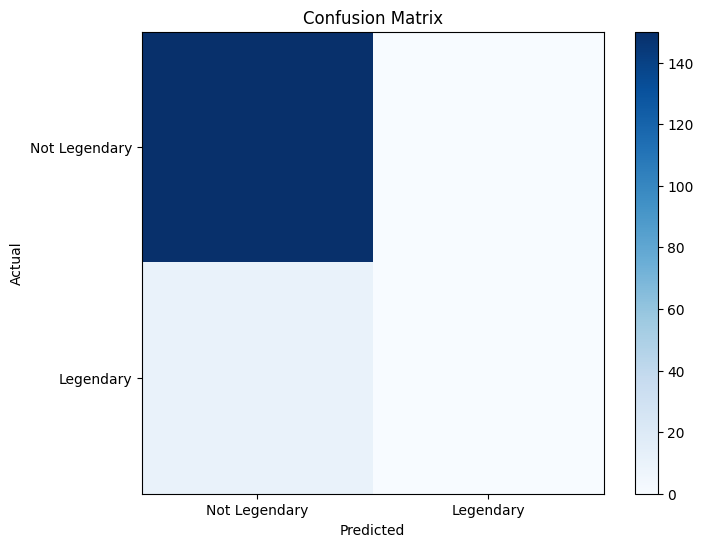

Accuracy: 0.9375


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler

# Load the Pokemon dataset (replace 'pokemon_stats.csv' with your actual dataset)
pokemon_data = pd.read_csv('/content/Pokemon.csv')

# Assuming you have a binary target variable 'Legendary' (1 if Pokemon is legendary, 0 otherwise)
# Modify this based on your actual dataset
X = pokemon_data[['HP', 'Attack', 'Defense', 'Speed']]
y = pokemon_data['Legendary']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features (important for Ridge regularization)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create a Ridge regression model with a specific alpha
alpha = 1.0
ridge_model = Ridge(alpha=alpha)
ridge_model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = ridge_model.predict(X_test_scaled)

# Convert predictions to binary (adjust threshold as needed)
threshold = 0.5
y_pred_binary = (y_pred > threshold).astype(int)

# Create and visualize the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_binary)

# Visualize the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()

classes = ['Not Legendary', 'Legendary']
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes)
plt.yticks(tick_marks, classes)

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Calculate and print accuracy
accuracy = accuracy_score(y_test, y_pred_binary)
print(f'Accuracy: {accuracy}')


In [5]:
import pandas as pd
import numpy as np
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler

# Load the Pokemon dataset
pokemon_data = pd.read_csv('/content/Pokemon.csv')

# Assuming you have a binary target variable 'Legendary' (1 if Pokemon is legendary, 0 otherwise)
X = pokemon_data[['HP', 'Attack', 'Defense', 'Speed']]
y = pokemon_data['Legendary']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features (important for Ridge regularization)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define a range of alpha values to evaluate
alphas_to_evaluate = [0.1, 0.5, 1.0, 5.0, 10.0]

# Evaluate Ridge regression for each alpha
for alpha in alphas_to_evaluate:
    ridge_model = Ridge(alpha=alpha)
    ridge_model.fit(X_train_scaled, y_train)

    # Make predictions on the test set
    y_pred = ridge_model.predict(X_test_scaled)

    # Convert predictions to binary (adjust threshold as needed)
    threshold = 0.5
    y_pred_binary = (y_pred > threshold).astype(int)

    # Calculate and print accuracy for each alpha
    accuracy = accuracy_score(y_test, y_pred_binary)
    print(f'Alpha: {alpha}, Accuracy: {accuracy}')


Alpha: 0.1, Accuracy: 0.9375
Alpha: 0.5, Accuracy: 0.9375
Alpha: 1.0, Accuracy: 0.9375
Alpha: 5.0, Accuracy: 0.9375
Alpha: 10.0, Accuracy: 0.9375
